# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

The database contains the following tables:
* Country
* League
* Match
* Player
* Player Attributes
* Team
* Team Attributes

List of columns of each table are shown in the Wrangling and EDA sections below.


### Question(s) for Analysis

## Here are my questions:

### Q1: Which players scored penalties the most (penalty top-scorers)? 
### Q2: Which players had the most penalties (the fouled player)?
### Q3: What team attributes lead to the most victories?
### Q4: What teams improved the most over the time period?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sqlalchemy import create_engine

from bs4 import BeautifulSoup
import os

import math

In [80]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01   33% |██████████▊                     | 3.5MB 28.6MB/s eta 0:00:01    97% |███████████████████████████████▏| 10.2MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  5% |█▊                              | 716kB 29.1MB/s eta 0:00:01    53% |█████████████████▏              | 7.2MB 27.1MB/s eta 0:00:01    76% |████████████████████████▍       | 10.2MB 27.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#engine = create_engine('sqlite:///bestofrt.db')
engine = create_engine('sqlite:///database.sqlite')

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_country = pd.read_sql('SELECT * FROM Country', engine, index_col='id')
#df_gather = pd.read_sql('master', engine)

In [4]:
df_country.head()

,name
id,
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy


In [5]:
df_league = pd.read_sql('SELECT * FROM League', engine)
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [6]:
df_league.tail()

,id,country_id,name
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA
10,24558,24558,Switzerland Super League


In [7]:
df_league[df_league['id']!=df_league['country_id']]

,id,country_id,name


#### [Comment] 'id' is always the same as 'country_id'. Hence, I'll use one of them to index the dataframe.

In [8]:
df_league.set_index('id')

,country_id,name
id,,
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League


In [9]:
df_match=pd.read_sql('Match', engine, index_col='id')
df_match.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [10]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 1 to 25979
Columns: 114 entries, country_id to BSA
dtypes: float64(96), int64(8), object(10)
memory usage: 22.8+ MB


In [11]:
list(df_match.columns)

['country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player_Y11',


#### [Comment] I'll use df_match to explore and answer most of the above questions. However, it has many columns that I won't use in my analysis. Hence, in the 'cleaning' section, I'll keep only the columns that are important for my analysis.

In [12]:
df_player = pd.read_sql('Player', engine, index_col='id')
df_player.head()

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182,154


In [13]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 1 to 11075
Data columns (total 6 columns):
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null int64
weight                11060 non-null int64
dtypes: int64(4), object(2)
memory usage: 604.8+ KB


In [14]:
df_player[df_player['player_name']=='Mohamed Salah']

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
7665,292462,Mohamed Salah,209331,1992-06-15 00:00:00,175,159


#### [Comment] 'Mohamed Salah' --> The Egyptian King

In [15]:
df_player_attributes=pd.read_sql('Player_Attributes', engine, index_col='id')
df_player_attributes.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
list(df_player_attributes.columns)

['player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [17]:
df_team=pd.read_sql('Team', engine, index_col='id')
df_team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name
id,,,,
1,9987,673.0,KRC Genk,GEN
2,9993,675.0,Beerschot AC,BAC
3,10000,15005.0,SV Zulte-Waregem,ZUL
4,9994,2007.0,Sporting Lokeren,LOK
5,9984,1750.0,KSV Cercle Brugge,CEB


In [18]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 51606
Data columns (total 4 columns):
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 11.7+ KB


In [19]:
df_team['team_fifa_api_id'].unique()

array([  6.73000000e+02,   6.75000000e+02,   1.50050000e+04,
         2.00700000e+03,   1.75000000e+03,   2.29000000e+02,
         6.74000000e+02,   1.74700000e+03,              nan,
         2.32000000e+02,   1.10724000e+05,   2.31000000e+02,
         5.46000000e+02,   1.00081000e+05,   1.11560000e+05,
         6.81000000e+02,   6.70000000e+02,   6.80000000e+02,
         2.39000000e+02,   2.01300000e+03,   1.00087000e+05,
         1.10913000e+05,   6.82000000e+02,   1.10000000e+01,
         1.30000000e+01,   1.00000000e+00,   1.09000000e+02,
         1.06000000e+02,   9.00000000e+00,   1.90000000e+01,
         1.91700000e+03,   2.00000000e+00,   1.00000000e+01,
         7.00000000e+00,   3.00000000e+00,   1.20000000e+01,
         1.80000000e+01,   4.00000000e+00,   1.80600000e+03,
         1.95200000e+03,   1.44000000e+02,   5.00000000e+00,
         1.79000000e+03,   8.80000000e+01,   1.10000000e+02,
         1.79600000e+03,   1.92600000e+03,   1.96000000e+03,
         1.50000000e+01,

In [20]:
df_team[df_team['team_fifa_api_id'].isnull()]

,team_api_id,team_fifa_api_id,team_long_name,team_short_name
id,,,,
9,7947,NaN,FCV Dender EH,DEN
15,4049,NaN,Tubize,TUB
26561,6601,NaN,FC Volendam,VOL
34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
35286,7992,NaN,Trofense,TRO
35291,10213,NaN,Amadora,AMA
36248,9765,NaN,Portimonense,POR
36723,4064,NaN,Feirense,FEI
38789,6367,NaN,Uniao da Madeira,MAD


#### [Comment] I won't clean the 'team_fifa_api_id'. It's not important for my analysis. 'team_api_id' is the important ID for my analysis, and I don't want to lose any team records.

In [21]:
df_team_attributes=pd.read_sql('Team_Attributes', engine, index_col='id')
df_team_attributes.head()

,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
id,,,,,,,,,,,,,,,,,,,,,
1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [22]:
list(df_team_attributes.columns)

['team_fifa_api_id',
 'team_api_id',
 'date',
 'buildUpPlaySpeed',
 'buildUpPlaySpeedClass',
 'buildUpPlayDribbling',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassing',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassing',
 'chanceCreationPassingClass',
 'chanceCreationCrossing',
 'chanceCreationCrossingClass',
 'chanceCreationShooting',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressure',
 'defencePressureClass',
 'defenceAggression',
 'defenceAggressionClass',
 'defenceTeamWidth',
 'defenceTeamWidthClass',
 'defenceDefenderLineClass']

In [23]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1458
Data columns (total 24 columns):
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositi


### Data Cleaning


In [24]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [24]:
df_match=df_match[['date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit'
 ]]
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 1 to 25979
Data columns (total 10 columns):
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
goal                14217 non-null object
shoton              14217 non-null object
shotoff             14217 non-null object
foulcommit          14217 non-null object
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


> **I kept only the above columns, which are the columns that I'll use to address my 'Questions'.**

In [25]:
df_match['date']=pd.to_datetime(df_match['date'])
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 1 to 25979
Data columns (total 10 columns):
date                25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
goal                14217 non-null object
shoton              14217 non-null object
shotoff             14217 non-null object
foulcommit          14217 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.2+ MB


>**I converted the 'date' column to the datetime format. This will allow me to extract the 'year' information.**

In [26]:
df_player.birthday=pd.to_datetime(df_player.birthday)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 1 to 11075
Data columns (total 6 columns):
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null int64
weight                11060 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 604.8+ KB


>**I converted the 'birthday' column to the datetime format.**

In [27]:
df_team_attributes.drop(columns=['buildUpPlayDribbling'], inplace=True)

>**Most of the data in the 'buildUpPlayDribbling' are Nulls. Hence, I dropped it to avoid losing other important data from the corresponding rows.**

In [28]:
df_team_attributes.date=pd.to_datetime(df_team_attributes.date)
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1458
Data columns (total 23 columns):
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositioningClass    1458 non-null object
defencePress

>**I converted the 'date' column to the datetime format. This will allow me to extract the 'year' information.**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### Research Question 1  (Which players scored penalties the most (top penalty scorer)?)

In [30]:
df_match_goals=df_match[['match_api_id','goal']]

In [31]:
df_match_goals.dropna(inplace=True)
df_match_goals.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,match_api_id,goal
id,,
1729,489042,<goal><value><comment>n</comment><stats><goals...
1730,489043,<goal><value><comment>n</comment><stats><goals...
1731,489044,<goal><value><comment>n</comment><stats><goals...
1732,489045,<goal><value><comment>n</comment><stats><goals...
1733,489046,<goal><value><comment>n</comment><stats><goals...


>**The 'goal' records are in HTML format, So, I'll use BeatifulSoup to parse them.
I referred to the 'European Soccer Database Supplementary' https://www.kaggle.com/jiezi2004/soccer to understand the tags and contents of the 'goal' and 'foulcommit' records.**

In [32]:
def parse_html_match_attrib(df, parsed_column, column_list):
    df_list=[]
    for index, row in df.iterrows():
        soup=BeautifulSoup(row[parsed_column],'lxml')
        values=soup.find_all('value')
        for value in values:
            goal_details_dict={}
            #value_soup=BeautifulSoup(value,'lxml')
            goal_details_dict["match_id"]=index
            for c in column_list:
                if value.find(c):
                    goal_details_dict[c]=value.find(c).contents[0]
            df_list.append(goal_details_dict)
                
    #print(goal_details_dict)
    return df_list

>**I'll use the above function to parse the 'goals' and 'foulcommit' columns of 'df_match' to be able to answer the first and the second questions.**

In [33]:
goals_df_list=parse_html_match_attrib(df_match_goals, 'goal', ['player1', 'team', 'goal_type', 'comment'])

In [34]:
df_goals = pd.DataFrame(goals_df_list, columns = ['match_id', 'player1', 'team', 'goal_type', 'comment'])
df_goals.head()

,match_id,player1,team,goal_type,comment
0,1729,37799,10261,n,n
1,1729,24148,10260,n,n
2,1730,26181,9825,n,n
3,1731,30853,8650,n,n
4,1732,23139,8654,n,n


>**I used 'goals_df_list' to create the 'df_goals' dataframe that will be used to analyze the goals.**

In [35]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62136 entries, 0 to 62135
Data columns (total 5 columns):
match_id     62136 non-null int64
player1      39863 non-null object
team         39946 non-null object
goal_type    39946 non-null object
comment      39980 non-null object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


In [36]:
df_goals.dropna(subset=['player1', 'team'], inplace=True)
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 0 to 62135
Data columns (total 5 columns):
match_id     39863 non-null int64
player1      39863 non-null object
team         39863 non-null object
goal_type    39863 non-null object
comment      39863 non-null object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [37]:
df_goals[df_goals.goal_type != df_goals.comment]

,match_id,player1,team,goal_type,comment
4064,3156,46700,10261,n,dg
4762,3386,181276,8659,o,n
5116,3509,46469,9825,o,n
52172,22695,33030,8315,o,n


>**According to the 'Supplementary' database (referenced above), 'comment' is more accurate/reliable than 'goal_type'. However, there is no discrepency between the two columns in the 'penalty' type**

In [38]:
df_goals['player1']=df_goals['player1'].astype(int)
df_goals['team']=df_goals['team'].astype(int)
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 0 to 62135
Data columns (total 5 columns):
match_id     39863 non-null int64
player1      39863 non-null int64
team         39863 non-null int64
goal_type    39863 non-null object
comment      39863 non-null object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


>**In the above cell, I converted the ID columns to the 'int' datatype.**

In [83]:
penalty_score_per_player_counts_df=df_goals[df_goals['goal_type']=='p'].groupby('player1').count()
penalty_score_per_player_counts_df.head()

,match_id,team,goal_type,comment
player1,,,,
101041,1,1,1,1
101422,3,3,3,3
102572,5,5,5,5
102612,17,17,17,17
102619,1,1,1,1


>**Players penalty scores (masking by 'goal_type', and grouping by 'player1', which is the player who scored the goal.)**

In [84]:
maximum_scored_penalties_player=penalty_score_per_player_counts_df.max()['match_id'].item()
maximum_scored_penalties_player

55

>**'maximum_scored_penalties_player' is the maximum number of penalties scored by a player.**

In [85]:
best_penalty_scoring_player=int(penalty_score_per_player_counts_df[penalty_score_per_player_counts_df['team']==maximum_scored_penalties_player]['goal_type'].index[0])#.item()
best_penalty_scoring_player

30893

In [86]:
df_player[df_player['player_api_id']==best_penalty_scoring_player]

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
1995,30893,Cristiano Ronaldo,20801,1985-02-05,185,176


>**'Cristiano Ronaldo' was the top penalty scorer in the period from 2008 until 2016.**

In [87]:
df_score_penalty_count.describe()

,match_id,team,goal_type,comment
count,819.000000,819.000000,819.000000,819.000000
mean,3.632479,3.632479,3.632479,3.632479
std,4.617440,4.617440,4.617440,4.617440
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000
max,55.000000,55.000000,55.000000,55.000000


In [88]:
df_top_penalty_scorers=df_score_penalty_count[df_score_penalty_count['goal_type']>20]
df_top_penalty_scorers.head()

,match_id,team,goal_type,comment
player1,,,,
27734,28,28,28,28
30549,23,23,23,23
30618,25,25,25,25
30631,25,25,25,25
30714,29,29,29,29


In [89]:
df_top_penalty_scorers.reset_index(inplace=True)
df_top_penalty_scorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
player1      10 non-null object
match_id     10 non-null int64
team         10 non-null int64
goal_type    10 non-null int64
comment      10 non-null int64
dtypes: int64(4), object(1)
memory usage: 480.0+ bytes


In [90]:
df_top_penalty_scorers.player1=df_top_penalty_scorers.player1.astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [91]:
df_top_penalty_scorers_player_details=df_top_penalty_scorers.merge(df_player,left_on='player1', right_on='player_api_id', how='inner')[['player_name', 'goal_type']].sort_values(['goal_type'], ascending=False)
df_top_penalty_scorers_player_details.rename(columns={'goal_type':'scored_penalties'}, inplace=True)

>**'df_top_penalty_scorers_player_details' is the list of top penalty players with the number of penalties each player scored. It was obtained with a merge between df_top_penalty_scorers & df_player.**

## Research Question 2 (Which players had the most penalties (the fouled players who were granted the most penalties)?)

>**In the following cells we will apply almost the same steps as in the analysis of Question 1:**

In [93]:
df_match_fouls=df_match[['match_api_id','foulcommit']]

In [94]:
df_match_fouls.dropna(inplace=True)
df_match_fouls.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,match_api_id,foulcommit
id,,
1729,489042,<foulcommit><value><stats><foulscommitted>1</f...
1730,489043,<foulcommit><value><stats><foulscommitted>1</f...
1731,489044,<foulcommit><value><stats><foulscommitted>1</f...
1732,489045,<foulcommit><value><stats><foulscommitted>1</f...
1733,489046,<foulcommit><value><stats><foulscommitted>1</f...


In [95]:
fouls_df_list=parse_html_match_attrib(df_match_fouls, 'foulcommit', ['player1', 'team', 'player2', 'subtype'])

In [97]:
df_fouls = pd.DataFrame(fouls_df_list, columns = ['match_id', 'player1', 'team', 'player2', 'subtype'])
df_fouls.head()

,match_id,player1,team,player2,subtype
0,1729,25518,10261,32569,NaN
1,1729,30929,10261,24157,NaN
2,1729,29581,10261,24148,NaN
3,1729,30373,10260,40565,NaN
4,1729,29581,10261,30829,pushing


In [98]:
df_fouls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432886 entries, 0 to 432885
Data columns (total 5 columns):
match_id    432886 non-null int64
player1     211406 non-null object
team        218824 non-null object
player2     190897 non-null object
subtype     116380 non-null object
dtypes: int64(1), object(4)
memory usage: 16.5+ MB


In [99]:
df_fouls.dropna(subset=['player2'], inplace=True)
df_fouls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190897 entries, 0 to 432880
Data columns (total 5 columns):
match_id    190897 non-null int64
player1     189339 non-null object
team        190896 non-null object
player2     190897 non-null object
subtype     105118 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [100]:
df_fouls['player2']=df_fouls['player2'].astype(int)

In [102]:
penalty_per_player_counts_df=df_fouls[df_fouls['subtype']=='penalty'].groupby('player2').count()
penalty_per_player_counts_df.head()

,match_id,player1,team,subtype
player2,,,,
2983,1,1,1,1
3512,1,1,1,1
3520,2,2,2,2
8985,1,1,1,1
11496,1,1,1,1


In [103]:
df_given_penalty_count=df_fouls[df_fouls['subtype']=='penalty'].groupby('player2').count()

In [104]:
maximum_granted_penalties_player=df_given_penalty_count.max()['match_id'].item()
maximum_granted_penalties_player

18

In [105]:
best_penalty_taking_player=penalty_per_player_counts_df[penalty_per_player_counts_df['team']==maximum_granted_penalties_player]['subtype'].index[0].item()

In [106]:
df_player[df_player['player_api_id']==best_penalty_taking_player]

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
id,,,,,,
6377,40636,Luis Suarez,176580,1987-01-24,182,187


In [107]:
df_given_penalty_count.describe()

,match_id,player1,team,subtype
count,1030.000000,1030.000000,1030.000000,1030.000000
mean,1.768932,1.763107,1.768932,1.768932
std,1.534509,1.532986,1.534509,1.534509
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,18.000000,18.000000,18.000000,18.000000


In [108]:
df_top_penalty_getters=df_given_penalty_count[df_given_penalty_count['subtype']>10]
df_top_penalty_getters

,match_id,player1,team,subtype
player2,,,,
19533,12,12,12,12
30893,14,14,14,14
35724,11,11,11,11
40636,18,18,18,18
49677,11,11,11,11


In [109]:
df_top_penalty_getters_player_details=df_top_penalty_getters.merge(df_player,left_index=True, right_on='player_api_id', how='inner')[['player_name', 'subtype']].sort_values(['subtype'], ascending=False)
df_top_penalty_getters_player_details.rename(columns={'subtype':'penalties_granted'}, inplace=True)

### Research Question 3  (What team attributes lead to the most victories?)

In [29]:
df_match['year']=df_match['date'].dt.year

In [31]:
df_match["home_team_win"]=df_match['home_team_goal']>df_match['away_team_goal']
df_match["home_team_loss"]=df_match['home_team_goal']<df_match['away_team_goal']
df_match["home_team_draw"]=df_match['home_team_goal']==df_match['away_team_goal']
df_match["away_team_win"]=df_match['home_team_goal']<df_match['away_team_goal']
df_match["away_team_loss"]=df_match['home_team_goal']>df_match['away_team_goal']
df_match["away_team_draw"]=df_match['home_team_goal']==df_match['away_team_goal']
df_match.head()

,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,year,home_team_win,home_team_loss,home_team_draw,away_team_win,away_team_loss,away_team_draw
id,,,,,,,,,,,,,,,,,
1,2008-08-17,492473,9987,9993,1,1,None,None,None,None,2008,False,False,True,False,False,True
2,2008-08-16,492474,10000,9994,0,0,None,None,None,None,2008,False,False,True,False,False,True
3,2008-08-16,492475,9984,8635,0,3,None,None,None,None,2008,False,True,False,True,False,False
4,2008-08-17,492476,9991,9998,5,0,None,None,None,None,2008,True,False,False,False,True,False
5,2008-08-16,492477,7947,9985,1,3,None,None,None,None,2008,False,True,False,True,False,False


In [32]:
df_home_team_results=df_match.groupby(['year', 'home_team_api_id']).sum()[['home_team_win','home_team_loss','home_team_draw']].reset_index()
df_home_team_results.head()

,year,home_team_api_id,home_team_win,home_team_loss,home_team_draw
0,2008,1601,5.0,2.0,2.0
1,2008,1957,4.0,2.0,2.0
2,2008,2182,5.0,1.0,2.0
3,2008,2183,5.0,1.0,3.0
4,2008,2186,2.0,3.0,3.0


In [33]:
df_home_team_results['total_played']=df_home_team_results['home_team_win']+df_home_team_results['home_team_loss']+df_home_team_results['home_team_draw']
df_home_team_results.head()

,year,home_team_api_id,home_team_win,home_team_loss,home_team_draw,total_played
0,2008,1601,5.0,2.0,2.0,9.0
1,2008,1957,4.0,2.0,2.0,8.0
2,2008,2182,5.0,1.0,2.0,8.0
3,2008,2183,5.0,1.0,3.0,9.0
4,2008,2186,2.0,3.0,3.0,8.0


In [34]:
df_away_team_results=df_match.groupby(['year', 'away_team_api_id']).sum()[['away_team_win','away_team_loss','away_team_draw']].reset_index()
df_away_team_results.head()

,year,away_team_api_id,away_team_win,away_team_loss,away_team_draw
0,2008,1601,1.0,5.0,2.0
1,2008,1957,0.0,5.0,4.0
2,2008,2182,6.0,2.0,1.0
3,2008,2183,5.0,1.0,2.0
4,2008,2186,1.0,6.0,2.0


In [35]:
df_away_team_results['total_played']=df_away_team_results['away_team_win']+df_away_team_results['away_team_loss']+df_away_team_results['away_team_draw']
df_away_team_results.head()

,year,away_team_api_id,away_team_win,away_team_loss,away_team_draw,total_played
0,2008,1601,1.0,5.0,2.0,8.0
1,2008,1957,0.0,5.0,4.0,9.0
2,2008,2182,6.0,2.0,1.0,9.0
3,2008,2183,5.0,1.0,2.0,8.0
4,2008,2186,1.0,6.0,2.0,9.0


>**In the above cells, I made two separate dataframes, one for the results of teams at home, and the other is for the results away.**

In [36]:
df_combined_results =df_home_team_results.merge(df_away_team_results,left_on=['year','home_team_api_id'], right_on=['year','away_team_api_id'],how='outer')
df_combined_results.head()

,year,home_team_api_id,home_team_win,home_team_loss,home_team_draw,total_played_x,away_team_api_id,away_team_win,away_team_loss,away_team_draw,total_played_y
0,2008,1601,5.0,2.0,2.0,9.0,1601,1.0,5.0,2.0,8.0
1,2008,1957,4.0,2.0,2.0,8.0,1957,0.0,5.0,4.0,9.0
2,2008,2182,5.0,1.0,2.0,8.0,2182,6.0,2.0,1.0,9.0
3,2008,2183,5.0,1.0,3.0,9.0,2183,5.0,1.0,2.0,8.0
4,2008,2186,2.0,3.0,3.0,8.0,2186,1.0,6.0,2.0,9.0


In [37]:
df_combined_results['total_wins']=df_combined_results['home_team_win']+df_combined_results['away_team_win']
df_combined_results['total_played']=df_combined_results['home_team_win']+df_combined_results['home_team_loss']+df_combined_results['home_team_draw']+df_combined_results['away_team_win']+df_combined_results['away_team_loss']+df_combined_results['away_team_draw']
df_combined_results['win_percent']=df_combined_results['total_wins']/df_combined_results['total_played']
df_win_scores=df_combined_results[['year', 'home_team_api_id', 'total_wins', 'total_played', 'win_percent']]

In [38]:
df_win_scores.head()

,year,home_team_api_id,total_wins,total_played,win_percent
0,2008,1601,6.0,17.0,0.352941
1,2008,1957,4.0,17.0,0.235294
2,2008,2182,11.0,17.0,0.647059
3,2008,2183,10.0,17.0,0.588235
4,2008,2186,3.0,17.0,0.176471


>**Then I combined both dataframes, and extracted the winning scores ('df_win_scores dataframe').**

In [39]:
df_win_scores.rename(columns={'home_team_api_id':'team_api_id'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [40]:
df_team_attributes["year"]=df_team_attributes.date.dt.year

In [41]:
df_team_attributes_plus_win_stats=df_team_attributes.merge(df_win_scores,left_on=['year','team_api_id'], right_on=['year','team_api_id'],how='inner')
df_team_attributes_plus_win_stats.head(30)

,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year,total_wins,total_played,win_percent
0,434,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,60,...,Medium,55,Press,45,Normal,Cover,2010,5.0,18.0,0.277778
1,434,9930,2014-09-19,52,Balanced,Normal,56,Mixed,Organised,54,...,Medium,44,Press,54,Normal,Cover,2014,10.0,37.0,0.270270
2,434,9930,2015-09-10,47,Balanced,Normal,54,Mixed,Organised,54,...,Medium,44,Press,54,Normal,Cover,2015,3.0,18.0,0.166667
3,77,8485,2010-02-22,70,Fast,Little,70,Long,Organised,70,...,Medium,70,Double,70,Wide,Cover,2010,11.0,40.0,0.275000
4,77,8485,2011-02-22,47,Balanced,Little,52,Mixed,Organised,53,...,Medium,47,Press,52,Normal,Cover,2011,11.0,41.0,0.268293
5,77,8485,2012-02-22,58,Balanced,Little,62,Mixed,Organised,45,...,Medium,40,Press,60,Normal,Cover,2012,12.0,38.0,0.315789
6,77,8485,2013-09-20,62,Balanced,Little,45,Mixed,Organised,40,...,Medium,42,Press,60,Normal,Cover,2013,14.0,36.0,0.388889
7,77,8485,2014-09-19,58,Balanced,Normal,62,Mixed,Organised,56,...,Medium,42,Press,60,Normal,Cover,2014,21.0,37.0,0.567568
8,77,8485,2015-09-10,59,Balanced,Normal,53,Mixed,Organised,51,...,Medium,45,Press,63,Normal,Cover,2015,24.0,41.0,0.585366
9,614,8576,2011-02-22,65,Balanced,Little,45,Mixed,Organised,65,...,Medium,45,Press,50,Normal,Cover,2011,3.0,19.0,0.157895


>**Then, I merged df_win_scores with df_team_attributes, to be able to check which team attributes results in better win scores.**

In [42]:
df_win_scores.describe()

,year,team_api_id,total_wins,total_played,win_percent
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,2012.002703,10362.916757,10.477297,28.085405,0.360381
std,2.541062,16805.631724,6.261541,9.389087,0.161133
min,2008.000000,1601.000000,0.000000,8.000000,0.000000
25%,2010.000000,8462.000000,5.000000,19.000000,0.243243
50%,2012.000000,8689.000000,10.000000,32.000000,0.333333
75%,2014.000000,9925.000000,14.000000,37.000000,0.450000
max,2016.000000,274581.000000,33.000000,44.000000,0.950000


### [Comment] I'll consider the high-vecoty teams are the teams that are in Q4 of 'win_percent', i.e. the teams that have 'win_percent' of more than 0.45

In [43]:
df_high_vectory_team_attrib=df_team_attributes_plus_win_stats[df_team_attributes_plus_win_stats['win_percent']>.45]
df_high_vectory_team_attrib.head()

,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year,total_wins,total_played,win_percent
7,77,8485,2014-09-19,58,Balanced,Normal,62,Mixed,Organised,56,...,Medium,42,Press,60,Normal,Cover,2014,21.0,37.0,0.567568
8,77,8485,2015-09-10,59,Balanced,Normal,53,Mixed,Organised,51,...,Medium,45,Press,63,Normal,Cover,2015,24.0,41.0,0.585366
13,47,8564,2010-02-22,45,Balanced,Little,30,Short,Free Form,55,...,Deep,35,Press,60,Normal,Offside Trap,2010,22.0,39.0,0.564103
14,47,8564,2011-02-22,65,Balanced,Little,50,Mixed,Organised,50,...,Medium,50,Press,50,Normal,Offside Trap,2011,23.0,37.0,0.621622
15,47,8564,2012-02-22,45,Balanced,Little,50,Mixed,Organised,65,...,Medium,45,Press,50,Normal,Cover,2012,21.0,39.0,0.538462


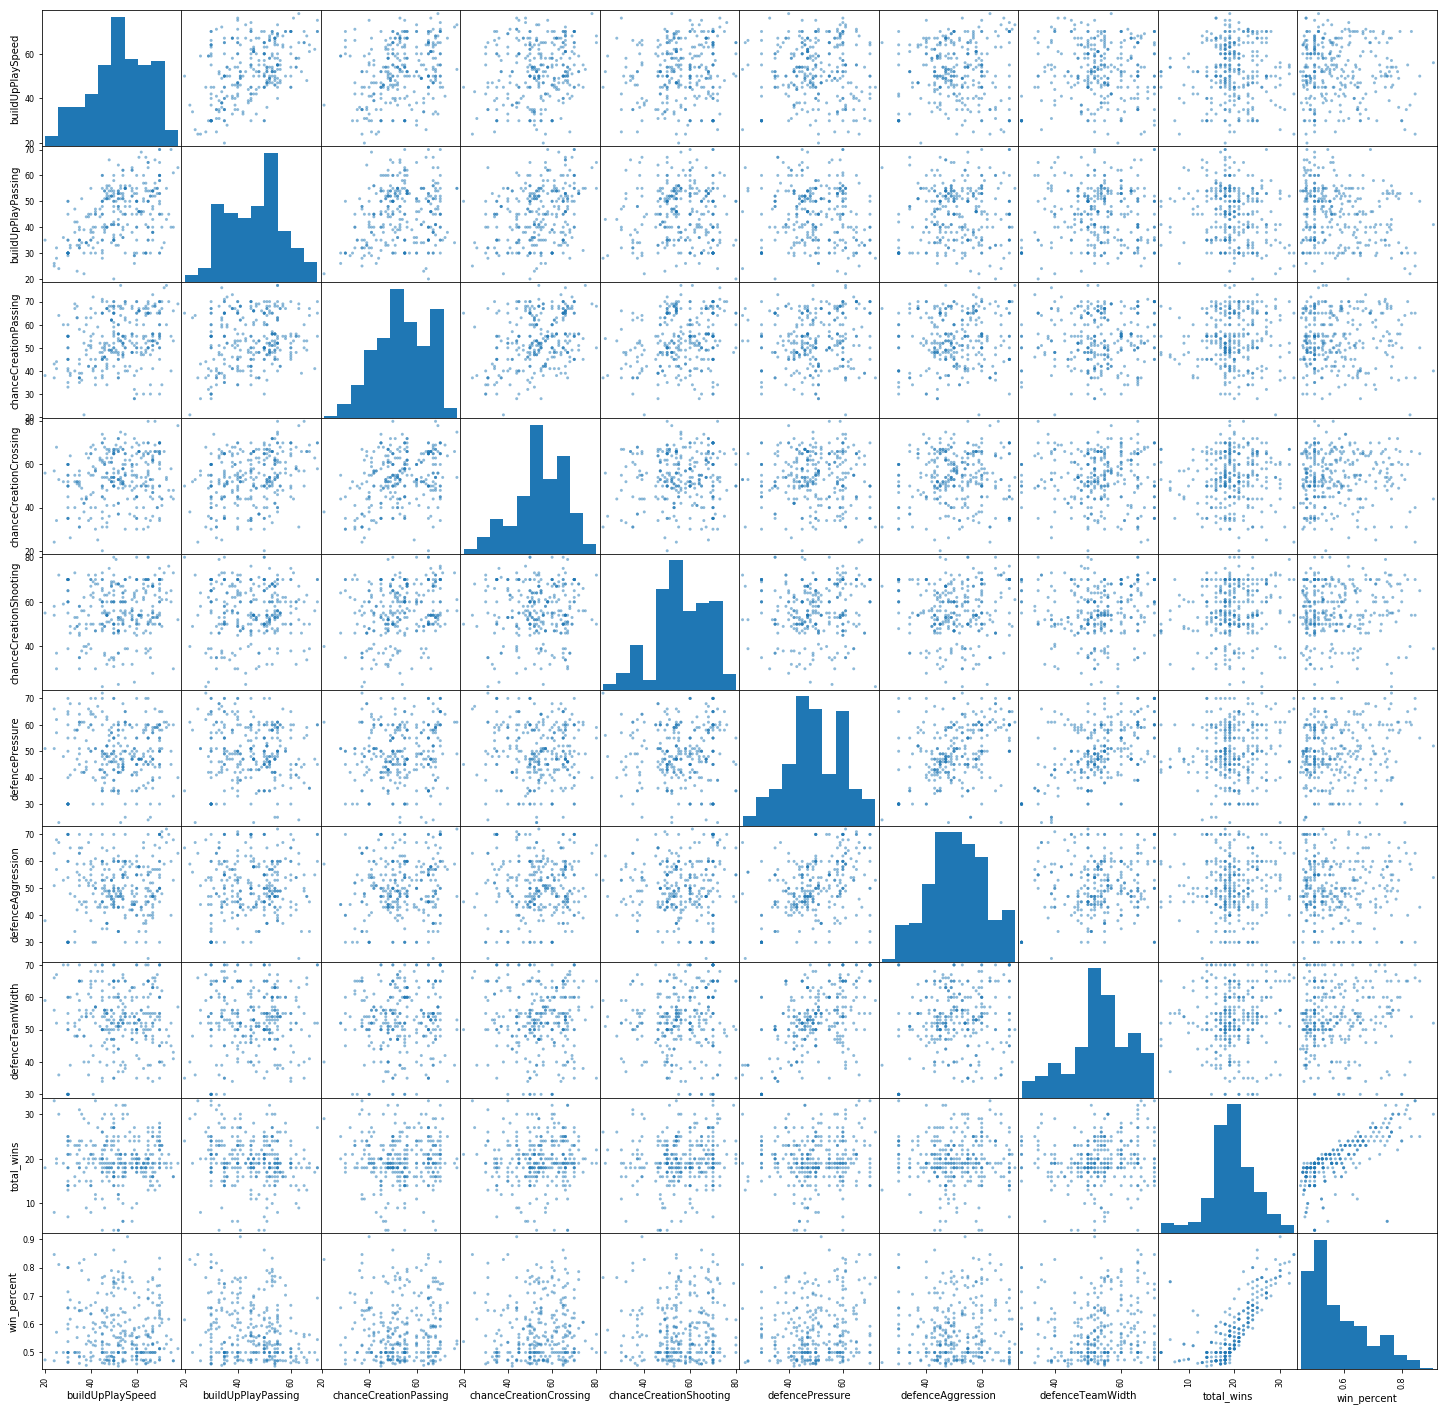

In [44]:
pd.plotting.scatter_matrix(df_high_vectory_team_attrib.drop(columns=['team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass', 'year', 'total_played']), figsize=(25,25));

### [Comment] The Scatter Plot is not showing a strong correlations between the 'win_percent' and the numerical team attributes

In [45]:
attrib_class_list=[i for i in list(df_high_vectory_team_attrib.columns) if i[-5:]=='Class']
attrib_class_list

['buildUpPlaySpeedClass',
 'buildUpPlayDribblingClass',
 'buildUpPlayPassingClass',
 'buildUpPlayPositioningClass',
 'chanceCreationPassingClass',
 'chanceCreationCrossingClass',
 'chanceCreationShootingClass',
 'chanceCreationPositioningClass',
 'defencePressureClass',
 'defenceAggressionClass',
 'defenceTeamWidthClass',
 'defenceDefenderLineClass']

In [46]:
df_p1=df_high_vectory_team_attrib['buildUpPlaySpeedClass'].value_counts()
df_p2=df_high_vectory_team_attrib['buildUpPlayDribblingClass'].value_counts()
df_p3=df_high_vectory_team_attrib['buildUpPlayPassingClass'].value_counts()
df_p4=df_high_vectory_team_attrib['buildUpPlayPositioningClass'].value_counts()
df_p5=df_high_vectory_team_attrib['chanceCreationPassingClass'].value_counts()
df_p6=df_high_vectory_team_attrib['chanceCreationCrossingClass'].value_counts()
df_p7=df_high_vectory_team_attrib['chanceCreationShootingClass'].value_counts()
df_p8=df_high_vectory_team_attrib['chanceCreationPositioningClass'].value_counts()
df_p9=df_high_vectory_team_attrib['defencePressureClass'].value_counts()
df_p10=df_high_vectory_team_attrib['defenceAggressionClass'].value_counts()
df_p11=df_high_vectory_team_attrib['defenceTeamWidthClass'].value_counts()
df_p12=df_high_vectory_team_attrib['defenceDefenderLineClass'].value_counts()
df_list=[df_p1, df_p2, df_p3, df_p4, df_p5, df_p6, df_p7, df_p8, df_p9, df_p10, df_p11, df_p12]
#len(df_list)

In [47]:
num_cols=3
num_rows=math.ceil(len(df_list)/num_cols)
#print(num_cols, num_rows)

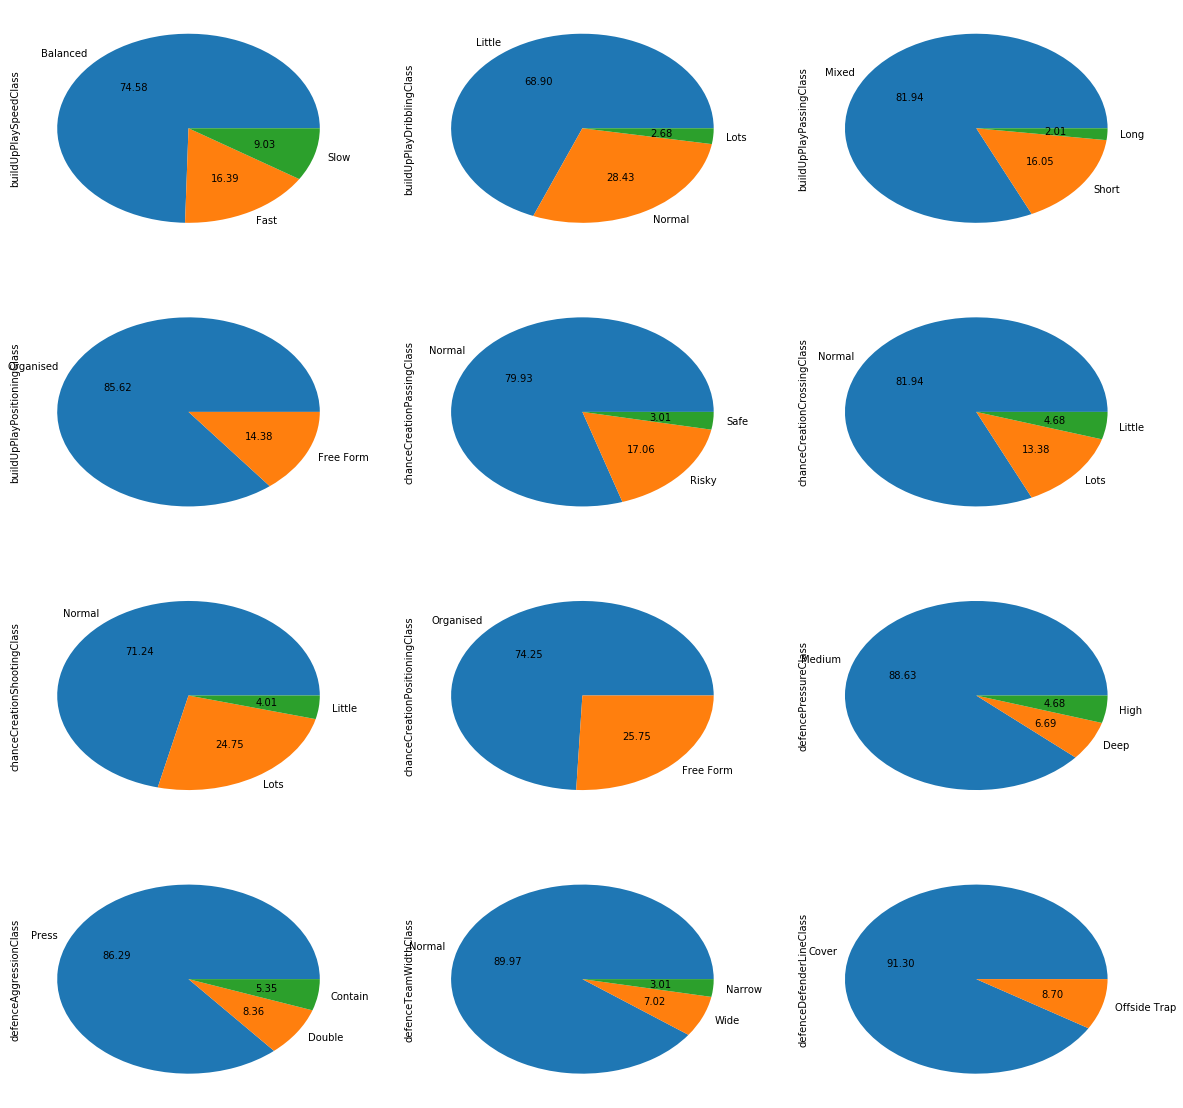

In [48]:
plt.figure(figsize=(20, 20))
for i in range(len(df_list)):
    plt.subplot(num_rows,num_cols,i+1)
    df_list[i].plot(kind='pie',autopct='%.2f')

### [Comment] The above pie charts show the attribute classes of the high vectory teams. The 'blue' part of the above pie charts show that the majority of the high vectory teams apply the same class in each attribute.

## Research Question 4 (What teams improved the most over the time period?)

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [50]:
years_list=list(df_win_scores.year.unique())
years_list

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [51]:
first_year=min(years_list)
first_year

2008

In [52]:
last_year=max(years_list)
last_year

2016

### [Comment] So, in the upcoming cells I'll compare the 'win_percent' of the teams in years 2008 and 2016 to explore the teams that improved the most.

In [53]:
df_team_wins_first_year=df_win_scores[df_win_scores.year==first_year]
df_team_wins_first_year.drop(columns=['year'], inplace=True)
df_team_wins_first_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,team_api_id,total_wins,total_played,win_percent
0,1601,6.0,17.0,0.352941
1,1957,4.0,17.0,0.235294
2,2182,11.0,17.0,0.647059
3,2183,10.0,17.0,0.588235
4,2186,3.0,17.0,0.176471


In [54]:
df_team_wins_last_year=df_win_scores[df_win_scores.year==last_year]
df_team_wins_last_year.drop(columns=['year'], inplace=True)
df_team_wins_last_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,team_api_id,total_wins,total_played,win_percent
1662,1601,2.0,9.0,0.222222
1663,1773,2.0,9.0,0.222222
1664,1957,3.0,9.0,0.333333
1665,2182,5.0,9.0,0.555556
1666,2186,2.0,9.0,0.222222


In [55]:
df_team_wins_last_year.tail()

,team_api_id,total_wins,total_played,win_percent
1845,158085,9.0,20.0,0.450000
1846,177361,2.0,9.0,0.222222
1847,188163,7.0,20.0,0.350000
1848,208931,7.0,21.0,0.333333
1849,274581,2.0,9.0,0.222222


In [56]:
# rename first year columns
df_team_wins_first_year.rename(columns=lambda x: x[:15] + "_first", inplace=True)
df_team_wins_first_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,team_api_id_first,total_wins_first,total_played_first,win_percent_first
0,1601,6.0,17.0,0.352941
1,1957,4.0,17.0,0.235294
2,2182,11.0,17.0,0.647059
3,2183,10.0,17.0,0.588235
4,2186,3.0,17.0,0.176471


In [57]:
# rename last year columns
df_team_wins_last_year.rename(columns=lambda x: x[:15] + "_last", inplace=True)
df_team_wins_last_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,team_api_id_last,total_wins_last,total_played_last,win_percent_last
1662,1601,2.0,9.0,0.222222
1663,1773,2.0,9.0,0.222222
1664,1957,3.0,9.0,0.333333
1665,2182,5.0,9.0,0.555556
1666,2186,2.0,9.0,0.222222


In [58]:
# merge datasets
df_wins_comparison =df_team_wins_first_year.merge(df_team_wins_last_year,left_on='team_api_id_first', right_on='team_api_id_last',how='inner')

### [Comment] If I divided the 'win_percent_last' over the 'win_percent_first', I'll get the percentage of improvement or declination in WINNING.

In [59]:
df_wins_comparison["win_percent_comparison"]=df_wins_comparison["win_percent_last"]/df_wins_comparison["win_percent_first"]
df_wins_comparison.describe()

,team_api_id_first,total_wins_first,total_played_first,win_percent_first,team_api_id_last,total_wins_last,total_played_last,win_percent_last,win_percent_comparison
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,9047.305344,7.160305,17.083969,0.418091,9047.305344,7.030534,17.381679,0.404073,1.046792
std,1503.857235,2.900442,2.019285,0.160956,1503.857235,3.812810,3.952522,0.192141,0.498723
min,1601.000000,2.000000,12.000000,0.117647,1601.000000,0.000000,9.000000,0.000000,0.000000
25%,8537.500000,5.000000,17.000000,0.294118,8537.500000,4.500000,17.000000,0.277778,0.687302
50%,9773.000000,7.000000,17.000000,0.411765,9773.000000,6.000000,19.000000,0.352941,1.000000
75%,9934.500000,9.000000,18.500000,0.539706,9934.500000,8.000000,20.000000,0.473684,1.384848
max,10269.000000,16.000000,20.000000,0.812500,10269.000000,19.000000,22.000000,0.950000,2.833333


In [60]:
df_most_improved=df_wins_comparison[df_wins_comparison['win_percent_comparison']>1.384848]

>**I masked the df_wins_comparison based on a win_percent improvement of 138%, because this was the 75% of 'win_percent_comparison'**

In [61]:
df_most_improved_teams=df_most_improved.merge(df_team, left_on='team_api_id_first', right_on='team_api_id', how='inner')[['team_long_name', 'win_percent_comparison']].sort_values('win_percent_comparison', ascending=False)
df_most_improved_teams

,team_long_name,win_percent_comparison
11,Chievo Verona,2.833333
19,Borussia Mönchengladbach,2.666667
30,FC Luzern,2.518519
3,Rio Ave FC,2.400000
14,Tottenham Hotspur,2.105263
28,FC Sion,1.888889
22,CF Os Belenenses,1.800000
6,Inverness Caledonian Thistle,1.777778
20,Borussia Dortmund,1.714286
9,Club Brugge KV,1.679012


In [62]:
df_team_attributes.describe()

,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871,2012.506859
std,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712,1.709201
min,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


### [Comment] From the above table, it's clear that 'Team Attributes' are recorded from 2010 until 2015, so I cannot merge the above list of improved teams with their attributes, because the years are different.

### [Comment] I'll repeat the above steps using the df_team_attributes_plus_win_stats to explore the attributes of the most improved teams from 2010 until 2015.

In [63]:
years_list=list(df_team_attributes.year.unique())
years_list

[2010, 2014, 2015, 2011, 2012, 2013]

In [64]:
first_year=min(years_list)
first_year

2010

In [65]:
last_year=max(years_list)
last_year

2015

In [66]:
df_team_attributes_first_year=df_team_attributes_plus_win_stats[df_team_attributes_plus_win_stats.year==first_year]
df_team_attributes_first_year.drop(columns=['date', 'year'], inplace=True)
df_team_attributes_first_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,total_wins,total_played,win_percent
0,434,9930,60,Balanced,Little,50,Mixed,Organised,60,Normal,...,50,Medium,55,Press,45,Normal,Cover,5.0,18.0,0.277778
3,77,8485,70,Fast,Little,70,Long,Organised,70,Risky,...,60,Medium,70,Double,70,Wide,Cover,11.0,40.0,0.275000
13,47,8564,45,Balanced,Little,30,Short,Free Form,55,Normal,...,30,Deep,35,Press,60,Normal,Offside Trap,22.0,39.0,0.564103
19,1901,10215,30,Slow,Little,30,Short,Organised,50,Normal,...,30,Deep,30,Contain,30,Narrow,Offside Trap,10.0,30.0,0.333333
25,650,10217,30,Slow,Little,35,Mixed,Organised,30,Safe,...,30,Deep,30,Contain,30,Narrow,Cover,12.0,35.0,0.342857


In [67]:
df_team_attributes_last_year=df_team_attributes_plus_win_stats[df_team_attributes_plus_win_stats.year==last_year]
df_team_attributes_last_year.drop(columns=['date', 'year'], inplace=True)
df_team_attributes_last_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,total_wins,total_played,win_percent
2,434,9930,47,Balanced,Normal,54,Mixed,Organised,54,Normal,...,47,Medium,44,Press,54,Normal,Cover,3.0,18.0,0.166667
8,77,8485,59,Balanced,Normal,53,Mixed,Organised,51,Normal,...,49,Medium,45,Press,63,Normal,Cover,24.0,41.0,0.585366
18,47,8564,48,Balanced,Lots,52,Mixed,Organised,66,Normal,...,58,Medium,57,Press,49,Normal,Cover,15.0,39.0,0.384615
24,1901,10215,53,Balanced,Normal,44,Mixed,Organised,55,Normal,...,39,Medium,38,Press,61,Normal,Cover,5.0,34.0,0.147059
30,650,10217,56,Balanced,Normal,66,Mixed,Organised,55,Normal,...,40,Medium,50,Press,52,Normal,Cover,10.0,34.0,0.294118


In [68]:
# rename first year columns
df_team_attributes_first_year.rename(columns=lambda x: x[:30] + "_first", inplace=True)
df_team_attributes_first_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,team_fifa_api_id_first,team_api_id_first,buildUpPlaySpeed_first,buildUpPlaySpeedClass_first,buildUpPlayDribblingClass_first,buildUpPlayPassing_first,buildUpPlayPassingClass_first,buildUpPlayPositioningClass_first,chanceCreationPassing_first,chanceCreationPassingClass_first,...,defencePressure_first,defencePressureClass_first,defenceAggression_first,defenceAggressionClass_first,defenceTeamWidth_first,defenceTeamWidthClass_first,defenceDefenderLineClass_first,total_wins_first,total_played_first,win_percent_first
0,434,9930,60,Balanced,Little,50,Mixed,Organised,60,Normal,...,50,Medium,55,Press,45,Normal,Cover,5.0,18.0,0.277778
3,77,8485,70,Fast,Little,70,Long,Organised,70,Risky,...,60,Medium,70,Double,70,Wide,Cover,11.0,40.0,0.275000
13,47,8564,45,Balanced,Little,30,Short,Free Form,55,Normal,...,30,Deep,35,Press,60,Normal,Offside Trap,22.0,39.0,0.564103
19,1901,10215,30,Slow,Little,30,Short,Organised,50,Normal,...,30,Deep,30,Contain,30,Narrow,Offside Trap,10.0,30.0,0.333333
25,650,10217,30,Slow,Little,35,Mixed,Organised,30,Safe,...,30,Deep,30,Contain,30,Narrow,Cover,12.0,35.0,0.342857


In [69]:
# rename last year columns
df_team_attributes_last_year.rename(columns=lambda x: x[:30] + "_last", inplace=True)
df_team_attributes_last_year.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,team_fifa_api_id_last,team_api_id_last,buildUpPlaySpeed_last,buildUpPlaySpeedClass_last,buildUpPlayDribblingClass_last,buildUpPlayPassing_last,buildUpPlayPassingClass_last,buildUpPlayPositioningClass_last,chanceCreationPassing_last,chanceCreationPassingClass_last,...,defencePressure_last,defencePressureClass_last,defenceAggression_last,defenceAggressionClass_last,defenceTeamWidth_last,defenceTeamWidthClass_last,defenceDefenderLineClass_last,total_wins_last,total_played_last,win_percent_last
2,434,9930,47,Balanced,Normal,54,Mixed,Organised,54,Normal,...,47,Medium,44,Press,54,Normal,Cover,3.0,18.0,0.166667
8,77,8485,59,Balanced,Normal,53,Mixed,Organised,51,Normal,...,49,Medium,45,Press,63,Normal,Cover,24.0,41.0,0.585366
18,47,8564,48,Balanced,Lots,52,Mixed,Organised,66,Normal,...,58,Medium,57,Press,49,Normal,Cover,15.0,39.0,0.384615
24,1901,10215,53,Balanced,Normal,44,Mixed,Organised,55,Normal,...,39,Medium,38,Press,61,Normal,Cover,5.0,34.0,0.147059
30,650,10217,56,Balanced,Normal,66,Mixed,Organised,55,Normal,...,40,Medium,50,Press,52,Normal,Cover,10.0,34.0,0.294118


In [70]:
# merge datasets
df_combined_first_last =df_team_attributes_first_year.merge(df_team_attributes_last_year,left_on='team_api_id_first', right_on='team_api_id_last',how='inner')

In [71]:
df_combined_first_last['win_percent_comparison']=df_combined_first_last['win_percent_last']/df_combined_first_last['win_percent_first']
df_combined_first_last.describe()

,team_fifa_api_id_first,team_api_id_first,buildUpPlaySpeed_first,buildUpPlayPassing_first,chanceCreationPassing_first,chanceCreationCrossing_first,chanceCreationShooting_first,defencePressure_first,defenceAggression_first,defenceTeamWidth_first,...,chanceCreationPassing_last,chanceCreationCrossing_last,chanceCreationShooting_last,defencePressure_last,defenceAggression_last,defenceTeamWidth_last,total_wins_last,total_played_last,win_percent_last,win_percent_comparison
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,13038.361702,9070.092199,50.120567,44.546099,51.794326,53.120567,62.177305,50.595745,52.014184,52.822695,...,53.354610,53.241135,49.553191,47.312057,50.000000,51.886525,13.716312,33.907801,0.394164,1.110834
std,34261.237880,1464.864011,15.787190,13.851496,12.857192,12.768530,8.449247,15.656116,16.740450,15.482840,...,10.574994,10.390174,12.169884,9.102696,8.180988,7.517686,6.402373,6.330088,0.161821,0.679384
min,1.000000,1601.000000,30.000000,30.000000,30.000000,30.000000,35.000000,30.000000,30.000000,30.000000,...,28.000000,26.000000,22.000000,25.000000,33.000000,29.000000,1.000000,9.000000,0.090909,0.207407
25%,72.000000,8543.000000,30.000000,30.000000,45.000000,43.000000,55.000000,30.000000,30.000000,35.000000,...,48.000000,48.000000,40.000000,41.000000,44.000000,48.000000,10.000000,32.000000,0.275000,0.740038
50%,452.000000,9772.000000,50.000000,45.000000,50.000000,50.000000,65.000000,50.000000,55.000000,55.000000,...,53.000000,53.000000,50.000000,47.000000,49.000000,52.000000,13.000000,34.000000,0.368421,0.950000
75%,1873.000000,9941.000000,65.000000,55.000000,65.000000,65.000000,70.000000,65.000000,70.000000,70.000000,...,62.000000,61.000000,58.000000,53.000000,57.000000,57.000000,18.000000,38.000000,0.473684,1.250000
max,111092.000000,10269.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,77.000000,80.000000,80.000000,72.000000,72.000000,73.000000,30.000000,41.000000,0.794118,5.800000


In [72]:
df_most_improved_2010_2015=df_combined_first_last[df_combined_first_last['win_percent_comparison']>1.25]

In [73]:
df_most_improved_teams_2010_2015=df_most_improved_2010_2015.merge(df_team, left_on='team_api_id_first', right_on='team_api_id', how='inner')
df_most_improved_teams_2010_2015_w_attrib=df_most_improved_teams_2010_2015[['team_long_name','win_percent_comparison', 'buildUpPlaySpeedClass_last', 'buildUpPlayPassingClass_last','buildUpPlayPassingClass_last',
 'buildUpPlayPositioningClass_last',
 'chanceCreationPassingClass_last',
 'chanceCreationCrossingClass_last',
 'chanceCreationShootingClass_last',
 'chanceCreationPositioningClass_last',
 'defencePressureClass_last',
 'defenceAggressionClass_last',
 'defenceTeamWidthClass_last',
 'defenceDefenderLineClass_last']].sort_values('win_percent_comparison', ascending=False)
df_most_improved_teams_2010_2015_w_attrib

,team_long_name,win_percent_comparison,buildUpPlaySpeedClass_last,buildUpPlayPassingClass_last,buildUpPlayPassingClass_last,buildUpPlayPositioningClass_last,chanceCreationPassingClass_last,chanceCreationCrossingClass_last,chanceCreationShootingClass_last,chanceCreationPositioningClass_last,defencePressureClass_last,defenceAggressionClass_last,defenceTeamWidthClass_last,defenceDefenderLineClass_last
25,Sporting Charleroi,5.800000,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
33,Willem II,3.774510,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
5,Borussia Mönchengladbach,3.500000,Slow,Short,Short,Organised,Normal,Little,Normal,Free Form,Medium,Press,Normal,Cover
30,Vitesse,2.873950,Balanced,Mixed,Mixed,Free Form,Normal,Normal,Lots,Free Form,Medium,Press,Normal,Cover
19,Paris Saint-Germain,2.500000,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
20,Piast Gliwice,2.437500,Balanced,Long,Long,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
13,Hull City,2.368421,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
7,SM Caen,2.131579,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
0,Aberdeen,2.128603,Balanced,Mixed,Mixed,Organised,Normal,Lots,Normal,Free Form,Medium,Press,Normal,Cover
8,Cracovia,2.041667,Balanced,Mixed,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Research Question 1 (Which players scored penalties the most (penalty top-scorers)?)

In [92]:
df_top_penalty_scorers_player_details

,player_name,scored_penalties
5,Cristiano Ronaldo,55
7,Zlatan Ibrahimovic,41
6,Lionel Messi,36
4,Francesco Totti,29
0,Antonio Di Natale,28
8,Sejad Salihovic,27
2,Steven Gerrard,25
3,Frank Lampard,25
1,Diego Milito,23
9,Edinson Cavani,23


>**Cristiano Ronaldo is the penalties top-scorer from 2008 until 2016.**

### Research Question 2 (Which players had the most penalties (the fouled players who were granted the most penalties)?)

In [75]:
df_top_penalty_getters_player_details

,player_name,penalties_granted
id,,
6377,Luis Suarez,18
1995,Cristiano Ronaldo,14
7867,Neymar,12
11057,Zlatan Ibrahimovic,11
2864,Edinson Cavani,11


>**Luis Suarez is the penalties top-getter from 2008 until 2016.**

### Research Question 3 (What team attributes lead to the most victories?)


In [74]:
print("Based on the above pie charts, the most of the 'High Vectory Teams' apply the following attribute Classes:\n")
for i in range(len(df_list)):
    print(attrib_class_list[i], " -> ", df_list[i][df_list[i]==df_list[i].max()].index[0])

Based on the above pie charts, the most of the 'High Vectory Teams' apply the following attribute Classes:

buildUpPlaySpeedClass  ->  Balanced
buildUpPlayDribblingClass  ->  Little
buildUpPlayPassingClass  ->  Mixed
buildUpPlayPositioningClass  ->  Organised
chanceCreationPassingClass  ->  Normal
chanceCreationCrossingClass  ->  Normal
chanceCreationShootingClass  ->  Normal
chanceCreationPositioningClass  ->  Organised
defencePressureClass  ->  Medium
defenceAggressionClass  ->  Press
defenceTeamWidthClass  ->  Normal
defenceDefenderLineClass  ->  Cover


### Research Question 4 (What teams improved the most over the time period?)
#### The following Table shows the teams who have improved their winning records by more than 125% when comparing the results of years 2010 and 2015. Most of them share the same attributes highlighted in the above conclusion.

In [75]:
df_most_improved_teams_2010_2015_w_attrib

,team_long_name,win_percent_comparison,buildUpPlaySpeedClass_last,buildUpPlayPassingClass_last,buildUpPlayPassingClass_last,buildUpPlayPositioningClass_last,chanceCreationPassingClass_last,chanceCreationCrossingClass_last,chanceCreationShootingClass_last,chanceCreationPositioningClass_last,defencePressureClass_last,defenceAggressionClass_last,defenceTeamWidthClass_last,defenceDefenderLineClass_last
25,Sporting Charleroi,5.800000,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
33,Willem II,3.774510,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
5,Borussia Mönchengladbach,3.500000,Slow,Short,Short,Organised,Normal,Little,Normal,Free Form,Medium,Press,Normal,Cover
30,Vitesse,2.873950,Balanced,Mixed,Mixed,Free Form,Normal,Normal,Lots,Free Form,Medium,Press,Normal,Cover
19,Paris Saint-Germain,2.500000,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
20,Piast Gliwice,2.437500,Balanced,Long,Long,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
13,Hull City,2.368421,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
7,SM Caen,2.131579,Balanced,Mixed,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
0,Aberdeen,2.128603,Balanced,Mixed,Mixed,Organised,Normal,Lots,Normal,Free Form,Medium,Press,Normal,Cover
8,Cracovia,2.041667,Balanced,Mixed,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover






### Limitations

## **** The limitation I found was that whereas the 'Match' table has records for matches from 2008 until 2016, the 'Team Attributes' table has records from 2010 until 2015 only. This didn't allow me to explore how the attributes of the improved teams changed in 2016.


## Submitting your Project 


In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0